# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Emotion Analysis with Hugging Face </div></b>



# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>1. Dataset Loading  </div></b>

In [1]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.1 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
emotions = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>2. Understanding the Dataset </div></b>

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
len(train_ds)

16000

In [6]:
train_ds[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [7]:
train_ds.column_names

['text', 'label']

In [8]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [9]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [10]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>3. From Dataset to Pandas  </div></b>

In [11]:
import pandas as pd
emotions.set_format(type= "pandas")
df=emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>4. Data Visualization  </div></b>

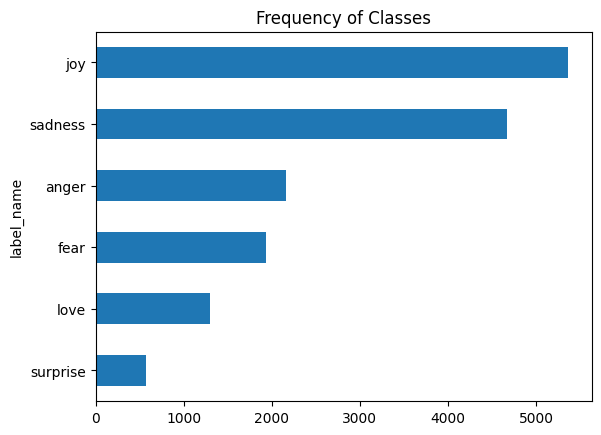

In [13]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending = True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

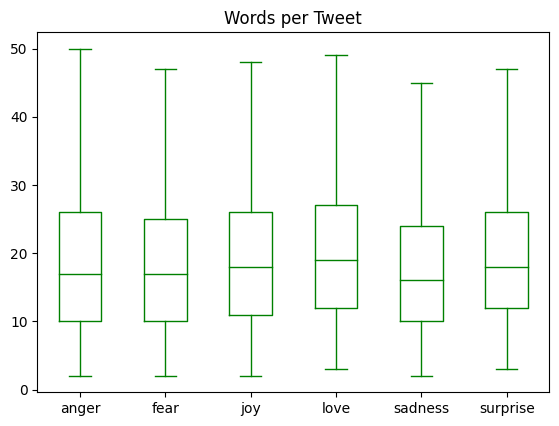

In [14]:
df["Words per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words per Tweet", by= "label_name", grid = False, showfliers = False, color = "green")
plt.suptitle("")
plt.xlabel("")
plt.ylabel("")
plt.show

In [15]:
emotions.reset_format()

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>5. Data Preprocessing   </div></b>

## Character Tokenization


In [16]:
text = "It's fun to work with NLP using HuggingFace"
tokenized_text = list(text)
print(tokenized_text)

['I', 't', "'", 's', ' ', 'f', 'u', 'n', ' ', 't', 'o', ' ', 'w', 'o', 'r', 'k', ' ', 'w', 'i', 't', 'h', ' ', 'N', 'L', 'P', ' ', 'u', 's', 'i', 'n', 'g', ' ', 'H', 'u', 'g', 'g', 'i', 'n', 'g', 'F', 'a', 'c', 'e']


In [17]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, "'": 1, 'F': 2, 'H': 3, 'I': 4, 'L': 5, 'N': 6, 'P': 7, 'a': 8, 'c': 9, 'e': 10, 'f': 11, 'g': 12, 'h': 13, 'i': 14, 'k': 15, 'n': 16, 'o': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'w': 22}


In [18]:
input_ids =[token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 20, 1, 19, 0, 11, 21, 16, 0, 20, 17, 0, 22, 17, 18, 15, 0, 22, 14, 20, 13, 0, 6, 5, 7, 0, 21, 19, 14, 16, 12, 0, 3, 21, 12, 12, 14, 16, 12, 2, 8, 9, 10]


## How to work one-hot encoding?


In [19]:
df = pd.DataFrame({"name": ["ahmet", "didar", "merve"],
                   "label":[0,1,2]})
df

,name,label
0,ahmet,0
1,didar,1
2,merve,2


In [20]:
pd.get_dummies(df, dtype=int)

,label,name_ahmet,name_didar,name_merve
0,0,1,0,0
1,1,0,1,0
2,2,0,0,1


## One-hot encoding with Torch


In [21]:
import torch
import torch.nn.functional as F

# Converting inputs into tensor
input_ids = torch.tensor(input_ids)

one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([43, 23])

In [22]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: I
Tensor index: 4
One-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Word Tokenization


In [23]:
tokenized_text = text.split()
print(tokenized_text)

["It's", 'fun', 'to', 'work', 'with', 'NLP', 'using', 'HuggingFace']


## Subword Tokenization


In [24]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Custom Tokenization


In [25]:
from transformers import DistilBertTokenizer

distbert_tokenize=DistilBertTokenizer.from_pretrained(model_ckpt)

## How to work with Tokenizer


In [26]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2009, 1005, 1055, 4569, 2000, 2147, 2007, 17953, 2361, 2478, 17662, 12172, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [27]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'it', "'", 's', 'fun', 'to', 'work', 'with', 'nl', '##p', 'using', 'hugging', '##face', '[SEP]']


In [28]:
tokenizer.convert_tokens_to_string(tokens)

"[CLS] it ' s fun to work with nlp using huggingface [SEP]"

## Attributes of Tokenizer


In [29]:
tokenizer.vocab_size

30522

In [30]:
tokenizer.model_max_length

512

## Tokenizing the entire dataset


In [32]:
def tokenize(batch):
  return tokenizer(batch["text"], truncation=True)

In [33]:
# How to work tokenizer on our some data:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [34]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]


## Padding


In [36]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer = tokenizer)

In [37]:
# Let's take a look at the columns of the dataset
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>6. Model Training   </div></b>

In [38]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Evaluate

In [39]:
!pip install -qU evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.8 MB/s eta 0:00:00


In [40]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis = 1)
  return accuracy.compute(predictions = predictions, references = labels)

## Logging to HuggingFace


In [41]:
from huggingface_hub import notebook_login

notebook_login()

## Setting Training Arguments


In [43]:
from transformers import TrainingArguments

training_args = TrainingArguments(
        output_dir="distilbert-emotion",
        num_train_epochs=2,
        per_device_train_batch_size=64,
        per_device_eval_batch_size=64,
        weight_decay=0.01,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        push_to_hub = True,
        report_to = "none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [44]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer,

)

In [45]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.180811,0.927000
2,0.334200,0.134757,0.941000


TrainOutput(global_step=500, training_loss=0.33420654296875, metrics={'train_runtime': 172.4966, 'train_samples_per_second': 185.511, 'train_steps_per_second': 2.899, 'total_flos': 467179604923392.0, 'train_loss': 0.33420654296875, 'epoch': 2.0})

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>7. Model Evaluation   </div></b>

## Predicting the validation dataset


In [46]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [47]:
preds_output.metrics

{'test_loss': 0.13475705683231354,
 'test_accuracy': 0.941,
 'test_runtime': 3.227,
 'test_samples_per_second': 619.778,
 'test_steps_per_second': 9.916}

## Confusion Matrix


In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(preds_output.predictions, axis=1)

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize = "true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels=labels)
    disp.plot(cmap="Blues", values_format = ".2f", ax = ax,
             colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()


In [55]:
y_valid = np.array(emotions_encoded["validation"]["label"])
labels = emotions["train"].features["label"].names


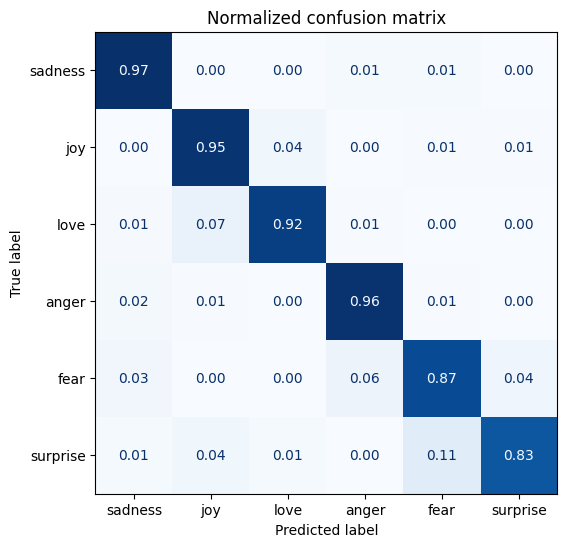

In [56]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [57]:
trainer.push_to_hub(commit_message="Training completed!")

CommitInfo(commit_url='https://huggingface.co/RidaDogrul/distilbert-emotion/commit/97d5f4d0b71739d3fff57ec46e1154043a520796', commit_message='Training completed!', commit_description='', oid='97d5f4d0b71739d3fff57ec46e1154043a520796', pr_url=None, pr_revision=None, pr_num=None)

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>8. Model Prediction   </div></b>

In [58]:
from transformers import pipeline

model_id =  "RidaDogrul/distilbert-emotion"
classifier = pipeline("text-classification", model= model_id)


config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [59]:
custom_text="I watched a movie yesterday. It was really good."

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


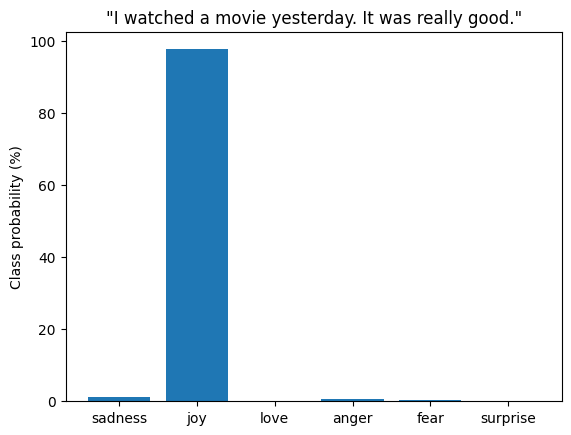

In [60]:
preds=classifier(custom_text, return_all_scores=True)
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100*preds_df["score"])
plt.title(f'"{custom_text}"')
plt.ylabel("Class probability (%)")
plt.show()
